In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("final_embedded_csv.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 513 entries, label to f_511
dtypes: float64(512), object(1)
memory usage: 3.1+ MB


In [4]:
df.columns

Index(['label', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8',
       ...
       'f_502', 'f_503', 'f_504', 'f_505', 'f_506', 'f_507', 'f_508', 'f_509',
       'f_510', 'f_511'],
      dtype='object', length=513)

In [5]:
df.isnull().sum()

label    0
f_0      0
f_1      0
f_2      0
f_3      0
        ..
f_507    0
f_508    0
f_509    0
f_510    0
f_511    0
Length: 513, dtype: int64

In [6]:
df.head()

,label,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_502,f_503,f_504,f_505,f_506,f_507,f_508,f_509,f_510,f_511
0,dhruba,0.029726,-0.092445,0.213671,0.019740,0.391974,-0.038868,0.041838,0.053921,0.075155,...,0.088721,-0.285008,-0.134947,0.040872,-0.077607,-0.027701,-0.089966,0.012817,0.146978,0.063946
1,dhruba,0.141043,-0.328111,0.079931,0.023237,0.333248,0.051442,-0.023635,0.076660,-0.008649,...,0.015363,-0.371145,0.036945,0.001729,0.069364,-0.098245,-0.036132,0.108396,0.183993,0.094727
2,dhruba,0.028026,-0.116650,0.020540,0.165807,0.291390,-0.000801,-0.124601,-0.178235,0.353902,...,0.244296,0.020433,-0.046235,-0.011383,-0.266983,-0.282953,-0.002089,-0.020039,-0.234393,0.437339
3,dhruba,-0.031670,-0.158239,0.011231,-0.079387,0.124464,0.089813,-0.015596,0.099975,0.247895,...,0.082123,-0.023457,-0.111517,0.002098,-0.090586,-0.139134,0.028298,0.039560,0.112235,0.247208
4,dhruba,0.024601,0.021898,0.094135,0.114495,0.240311,0.027011,0.003412,-0.025758,0.261592,...,0.133661,-0.210711,-0.180393,-0.060051,-0.034282,-0.219786,-0.037112,0.006133,0.228830,-0.114237


In [7]:
df.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_502,f_503,f_504,f_505,f_506,f_507,f_508,f_509,f_510,f_511
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,-0.034759,0.008917,0.048685,-0.109378,0.057812,0.060019,0.061031,0.004466,-0.011947,-0.056402,...,0.028732,-0.108034,-0.020053,0.000102,0.063320,-0.166564,0.020353,0.087722,-0.049712,-0.046373
std,0.110918,0.162581,0.122178,0.180463,0.163436,0.088588,0.111644,0.110617,0.164251,0.139547,...,0.183862,0.118245,0.133495,0.153018,0.144999,0.122123,0.112316,0.106117,0.187611,0.222583
min,-0.336011,-0.405340,-0.370188,-0.622401,-0.333010,-0.347078,-0.237143,-0.324224,-0.565172,-0.429941,...,-1.002190,-0.496056,-0.455080,-0.769629,-0.330316,-0.513401,-0.295638,-0.188978,-0.644904,-1.083903
25%,-0.094820,-0.092856,-0.036641,-0.240485,-0.073593,0.003643,-0.014204,-0.063037,-0.121159,-0.151644,...,-0.045337,-0.177449,-0.110471,-0.090472,-0.033718,-0.260861,-0.062714,0.015642,-0.166164,-0.163110
50%,-0.015629,-0.014857,0.040851,-0.118782,0.071841,0.058585,0.051840,0.016921,-0.008621,-0.049027,...,0.045102,-0.096694,-0.021287,-0.007401,0.059233,-0.155243,0.022871,0.085768,-0.034601,-0.039741
75%,0.041358,0.080060,0.128089,0.026793,0.170512,0.118196,0.122284,0.080381,0.115239,0.060149,...,0.121403,-0.031827,0.060269,0.089820,0.161416,-0.077532,0.098629,0.154556,0.072849,0.095524
max,0.243352,0.696447,0.387775,0.430784,0.540579,0.319107,0.376626,0.300281,0.389784,0.266610,...,0.475244,0.248772,0.409536,0.471448,0.455063,0.172514,0.315936,0.386509,0.469073,0.498209


In [9]:
df.shape

(780, 513)

In [20]:
df['label'].value_counts()

label
pabitra    306
nabin      246
dhruba     228
Name: count, dtype: int64

In [19]:
df['label'].unique()

array(['dhruba', 'nabin', 'pabitra'], dtype=object)

In [10]:
df.ndim

2

Text(0.5, 1.0, 'Distribution Plot')

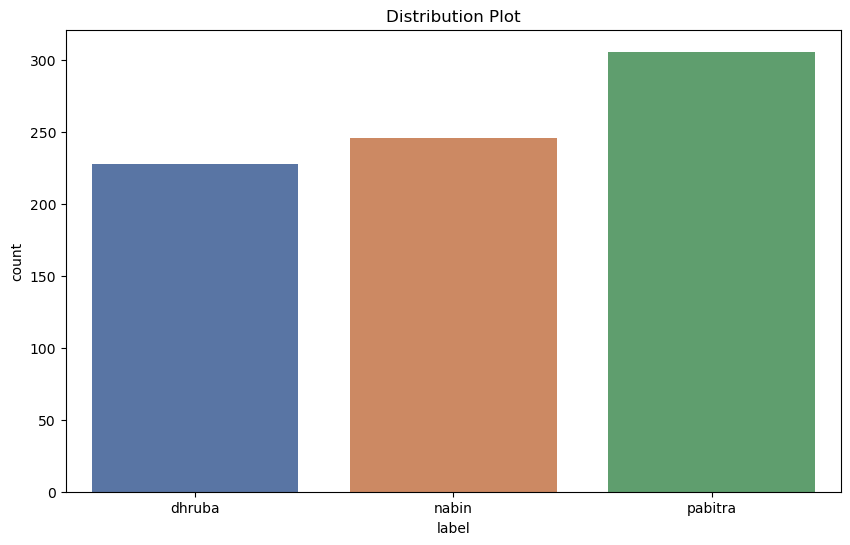

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x="label",data=df,palette="deep",hue="label",legend=False)
plt.title("Distribution Plot")

In [21]:
X = df.drop(columns='label')
y = df['label']

In [22]:
X

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_502,f_503,f_504,f_505,f_506,f_507,f_508,f_509,f_510,f_511
0,0.029726,-0.092445,0.213671,0.019740,0.391974,-0.038868,0.041838,0.053921,0.075155,-0.255514,...,0.088721,-0.285008,-0.134947,0.040872,-0.077607,-0.027701,-0.089966,0.012817,0.146978,0.063946
1,0.141043,-0.328111,0.079931,0.023237,0.333248,0.051442,-0.023635,0.076660,-0.008649,-0.190360,...,0.015363,-0.371145,0.036945,0.001729,0.069364,-0.098245,-0.036132,0.108396,0.183993,0.094727
2,0.028026,-0.116650,0.020540,0.165807,0.291390,-0.000801,-0.124601,-0.178235,0.353902,-0.265910,...,0.244296,0.020433,-0.046235,-0.011383,-0.266983,-0.282953,-0.002089,-0.020039,-0.234393,0.437339
3,-0.031670,-0.158239,0.011231,-0.079387,0.124464,0.089813,-0.015596,0.099975,0.247895,-0.063304,...,0.082123,-0.023457,-0.111517,0.002098,-0.090586,-0.139134,0.028298,0.039560,0.112235,0.247208
4,0.024601,0.021898,0.094135,0.114495,0.240311,0.027011,0.003412,-0.025758,0.261592,-0.052182,...,0.133661,-0.210711,-0.180393,-0.060051,-0.034282,-0.219786,-0.037112,0.006133,0.228830,-0.114237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.001952,0.175020,0.119932,-0.202418,-0.121157,0.074420,0.164065,0.065998,-0.008593,0.119407,...,0.152764,-0.057335,0.054000,0.200295,0.435771,-0.213243,-0.107531,0.045934,-0.097403,0.145303
776,0.034482,0.558114,0.174646,-0.327107,-0.186093,0.048372,0.093982,0.043776,0.041897,-0.151594,...,0.317565,-0.398532,-0.077176,0.307439,0.078080,-0.328600,-0.232795,0.123459,-0.065071,-0.114181
777,0.072165,0.412914,0.206320,-0.277687,-0.173619,-0.028660,0.047569,0.037179,0.015603,-0.134129,...,0.377276,-0.344283,-0.142986,0.167897,0.146589,-0.355402,-0.220974,-0.049243,-0.050814,0.004433
778,0.106814,-0.227453,0.093680,-0.023198,-0.128065,-0.065134,0.022944,0.129381,0.106303,-0.037134,...,0.080548,-0.101669,-0.009885,0.105118,0.153942,-0.142200,-0.020909,-0.049434,0.037769,-0.017306


In [23]:
y

0       dhruba
1       dhruba
2       dhruba
3       dhruba
4       dhruba
        ...   
775    pabitra
776    pabitra
777    pabitra
778    pabitra
779    pabitra
Name: label, Length: 780, dtype: object

In [26]:
# training without standard scaler and without parameter tuning
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
svm_clf = SVC(kernel = "linear",random_state = 42)
svm_clf.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [29]:
y_pred = svm_clf.predict(X_test)

In [32]:
print(accuracy_score(y_pred,y_test))

0.9935897435897436


In [31]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[41  0  0]
 [ 0 51  1]
 [ 0  0 63]]


<Axes: >

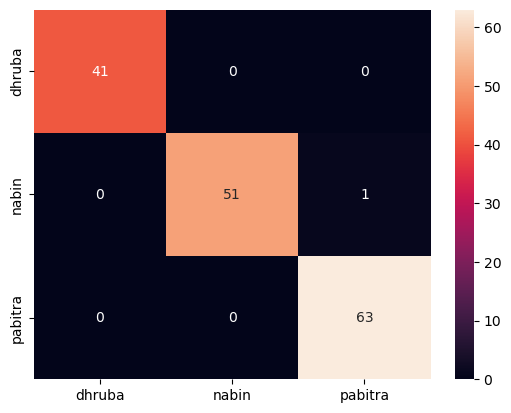

In [40]:
sns.heatmap(cm,annot=True,xticklabels=df['label'].unique(),yticklabels=df['label'].unique())

In [34]:
classi = classification_report(y_pred,y_test)
print(classi)

              precision    recall  f1-score   support

      dhruba       1.00      1.00      1.00        41
       nabin       1.00      0.98      0.99        52
     pabitra       0.98      1.00      0.99        63

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



<Axes: >

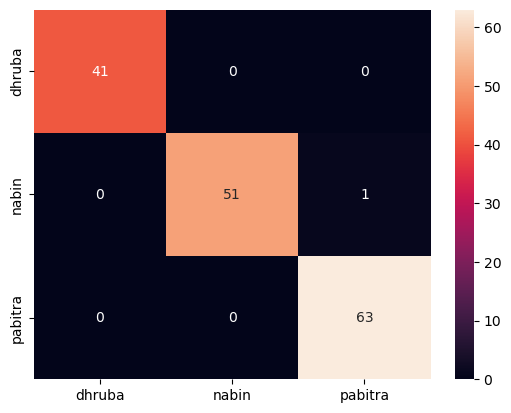

In [41]:
# now trained using standard Scaler and hyperparamerter tuning 
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [43]:
# hyper parameter tuning 
param_grid = {
     'kernel' :['linear','rbf','poly'],
     'C' :[0.1,1,10],
     'gamma' :['scale','auto']
}
svm_c = SVC()
grid_search = GridSearchCV(estimator=svm_c,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1)
grid_search.fit(X_scaled_train,y_train)
print("Best", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [46]:
y_pred = grid_search.best_estimator_.predict(X_scaled_test)
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")

Accuracy Score: 0.9935897435897436


In [47]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      dhruba       1.00      1.00      1.00        41
       nabin       1.00      0.98      0.99        52
     pabitra       0.98      1.00      0.99        63

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



<Axes: >

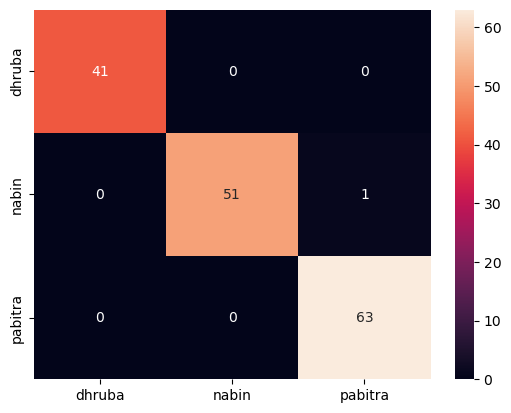

In [48]:
cm1 = confusion_matrix(y_pred,y_test)
sns.heatmap(cm1,annot=True,xticklabels=df['label'].unique(),yticklabels=df['label'].unique())

In [49]:
import joblib
import os
loaded_models = {
    "scaler" : scaler,
    "grid_search" : grid_search
}
joblib.dump(loaded_models,"all_loaded_models")

['all_loaded_models']

In [51]:
loaded = joblib.load("all_loaded_models")
print(loaded)

{'scaler': StandardScaler(), 'grid_search': GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)}


In [52]:
scaler = loaded.get('scaler')

In [53]:
grid_search = loaded.get('grid_search')